https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine

https://www.kaggle.com/kabure/wine-review-s-understanding-pythonic-eda

https://www.kaggle.com/chocozzz/house-price-prediction-eda-updated-2019-03-12

https://www.kaggle.com/tmheo74/geo-data-eda-and-feature-engineering#K-Means-Clustering---Lat,-Long

https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values

https://www.kaggle.com/dansbecker/handling-missing-values

https://www.kaggle.com/meikegw/filling-up-missing-values

https://www.kaggle.com/nikunjm88/carefully-dealing-with-missing-values

https://rstudio-pubs-static.s3.amazonaws.com/246255_c1ea14b56f8d40c0959d8e9aa46bca34.html

http://rstudio-pubs-static.s3.amazonaws.com/80458_5000e31f84df449099a872ccf40747b7.html

https://rstudio-pubs-static.s3.amazonaws.com/142451_096eafe187b34ade916fcbe10bb432b2.html

https://rpubs.com/szon0111/P4

https://bibinmjose.github.io/RedWineDataAnalysis/

https://www.kaggle.com/rhodiumbeng/red-wine-analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
# scatter_quantile_graph




#ignore warnings
import warnings
warnings.filterwarnings('ignore')



plt.style.use('seaborn')
sns.set(font_scale=2.5) 
# 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 
# seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import missingno as msno


%matplotlib inline

In [242]:
def scatter_quantile_graph(frame, col1, col2):
    col1_quantile = np.arange(0,1.1,0.1)
    col2_quantile = np.arange(0,1.1,0.1)

    for quantile_value in frame[col1].quantile(col1_quantile):
        plt.axvline(quantile_value, color='red', alpha=0.3)
    for quantile_value in frame[col2].quantile(col2_quantile):
        plt.axhline(quantile_value, color='blue', alpha=0.3)
        
    sns.scatterplot(col1, col2, hue='alcohol',data=frame)
    
    plt.title('{} - {}'.format(col1,col2))
    plt.show()

In [2]:
origin_data = pd.read_csv('./data/wine_quality_red.csv')
origin_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
a = origin_data[origin_data['total sulfur dioxide'] >= 160]
a

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
354             6.1              0.21         0.40             1.4      0.066   
1079            7.9              0.30         0.68             8.3      0.050   
1081            7.9              0.30         0.68             8.3      0.050   
1244            5.9              0.29         0.25            13.4      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
354                  40.5                 165.0  0.99120  3.25       0.59   
1079                 37.5                 278.0  0.99316  3.01       0.51   
1081                 37.5                 289.0  0.99316  3.01       0.51   
1244                 72.0                 160.0  0.99721  3.33       0.54   

      alcohol  quality  
354      11.9        6  
1079     12.3        7  
1081     12.3        7  
1244     10.3        6

In [10]:
a = origin_data[origin_data['free sulfur dioxide'] > 50]
a

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
396             6.6             0.735         0.02             7.9      0.122   
400             6.6             0.735         0.02             7.9      0.122   
584            11.8             0.330         0.49             3.4      0.093   
925             8.6             0.220         0.36             1.9      0.064   
926             9.4             0.240         0.33             2.3      0.061   
982             7.3             0.520         0.32             2.1      0.070   
1131            5.9             0.190         0.21             1.7      0.045   
1244            5.9             0.290         0.25            13.4      0.067   
1295            6.6             0.630         0.00             4.3      0.093   
1296            6.6             0.630         0.00             4.3      0.093   
1358            7.4             0.640         0.17             5.4      0.168   
1434           10.2             0.540         0.37            15.4      0.214   
1435           10.2             0.540         0.37            15.4      0.214   
1558            6.9             0.630         0.33             6.7      0.235   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
14                   52.0                 145.0  0.99860  3.16       0.88   
15                   51.0                 148.0  0.99860  3.17       0.93   
396                  68.0                 124.0  0.99940  3.47       0.53   
400                  68.0                 124.0  0.99940  3.47       0.53   
584                  54.0                  80.0  1.00020  3.30       0.76   
925                  53.0                  77.0  0.99604  3.47       0.87   
926                  52.0                  73.0  0.99786  3.47       0.90   
982                  51.0                  70.0  0.99418  3.34       0.82   
1131                 57.0                 135.0  0.99341  3.32       0.44   
1244                 72.0                 160.0  0.99721  3.33       0.54   
1295                 51.0                  77.5  0.99558  3.20       0.45   
1296                 51.0                  77.5  0.99558  3.20       0.45   
1358                 52.0                  98.0  0.99736  3.28       0.50   
1434                 55.0                  95.0  1.00369  3.18       0.77   
1435                 55.0                  95.0  1.00369  3.18       0.77   
1558                 66.0                 115.0  0.99787  3.22       0.56   

      alcohol  quality  
14        9.2        5  
15        9.2        5  
396       9.9        5  
400       9.9        5  
584      10.7        7  
925      11.0        7  
926      10.2        6  
982      12.9        6  
1131      9.5        5  
1244     10.3        6  
1295      9.5        5  
1296      9.5        5  
1358      9.5        5  
1434      9.0        6  
1435      9.0        6  
1558      9.5        5

## Summary statistics

In [3]:
origin_data.shape

(1599, 12)

In [4]:
origin_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
origin_data.describe().round(3)

fixed acidity  volatile acidity  citric acid  residual sugar  \
count       1599.000          1599.000     1599.000        1599.000   
mean           8.320             0.528        0.271           2.539   
std            1.741             0.179        0.195           1.410   
min            4.600             0.120        0.000           0.900   
25%            7.100             0.390        0.090           1.900   
50%            7.900             0.520        0.260           2.200   
75%            9.200             0.640        0.420           2.600   
max           15.900             1.580        1.000          15.500   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
count   1599.000             1599.000              1599.000  1599.000   
mean       0.087               15.875                46.468     0.997   
std        0.047               10.460                32.895     0.002   
min        0.012                1.000                 6.000     0.990   
25%        0.070                7.000                22.000     0.996   
50%        0.079               14.000                38.000     0.997   
75%        0.090               21.000                62.000     0.998   
max        0.611               72.000               289.000     1.004   

             pH  sulphates   alcohol   quality  
count  1599.000   1599.000  1599.000  1599.000  
mean      3.311      0.658    10.423     5.636  
std       0.154      0.170     1.066     0.808  
min       2.740      0.330     8.400     3.000  
25%       3.210      0.550     9.500     5.000  
50%       3.310      0.620    10.200     6.000  
75%       3.400      0.730    11.100     6.000  
max       4.010      2.000    14.900     8.000

In [6]:
extra = origin_data[origin_data.duplicated()]
extra.shape

(240, 12)

In [7]:
extra.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4             7.4             0.700         0.00            1.90      0.076   
11            7.5             0.500         0.36            6.10      0.071   
27            7.9             0.430         0.21            1.60      0.106   
40            7.3             0.450         0.36            5.90      0.074   
65            7.2             0.725         0.05            4.65      0.086   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                  11.0                  34.0   0.9978  3.51       0.56   
11                 17.0                 102.0   0.9978  3.35       0.80   
27                 10.0                  37.0   0.9966  3.17       0.91   
40                 12.0                  87.0   0.9978  3.33       0.83   
65                  4.0                  11.0   0.9962  3.41       0.39   

    alcohol  quality  
4       9.4        5  
11     10.5        5  
27      9.5        5  
40     10.5        5  
65     10.9        5

> 240개의 중복이 존재, 

In [8]:
origin_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [9]:
wine_quality = origin_data.quality
X = origin_data.drop('quality', axis=1)
print(wine_quality.shape, X.shape)

(1599,) (1599, 11)


In [10]:
# fixed acidity     비휘발성 산
# volatile acidity     휘발성 산
# citric acid     구연산(시트르산)

# ---------------------------------

# residual sugar     잔당
# chlorides     염화물
# free sulfur dioxide     유리 이산화황
# total sulfur dioxide     총 이산화황
# density     밀도
# pH     산도(수소 이온 농도)


# sulphates     황산염


# alcohol     알코올
# ----------------------------------------
# quality     와인 품질(나쁨 : 0 ~ 좋음 : 10)

# 'A' = 35
# 'B' = 10                      
# 'C' = 15wine_quality
# 'D' = 25
# 'E' = 15
# 'F' = 20
# 'G' = 30
# 'H' = 10

## Visualization 

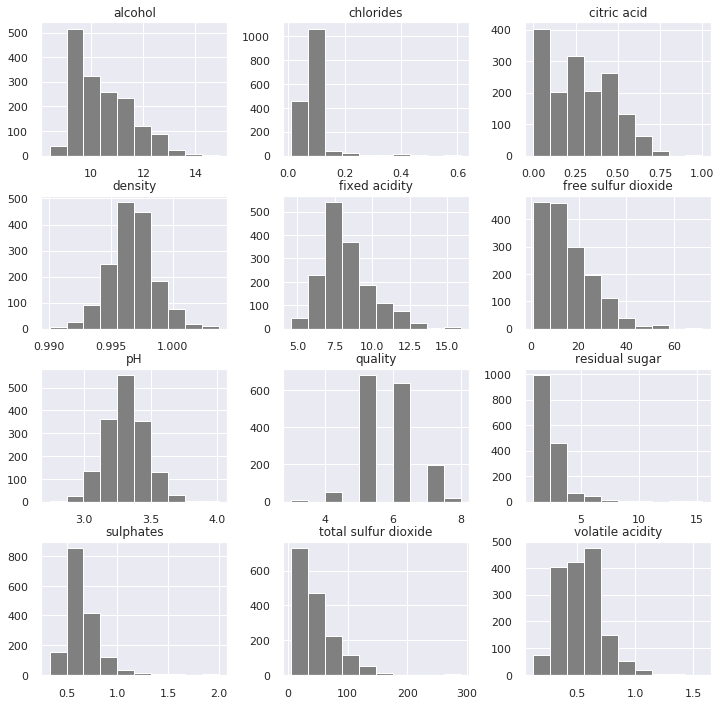

In [11]:
sns.set()
origin_data.hist(figsize=(12,12), color='gray')
plt.show()

## Fixed acidity 기준 corr

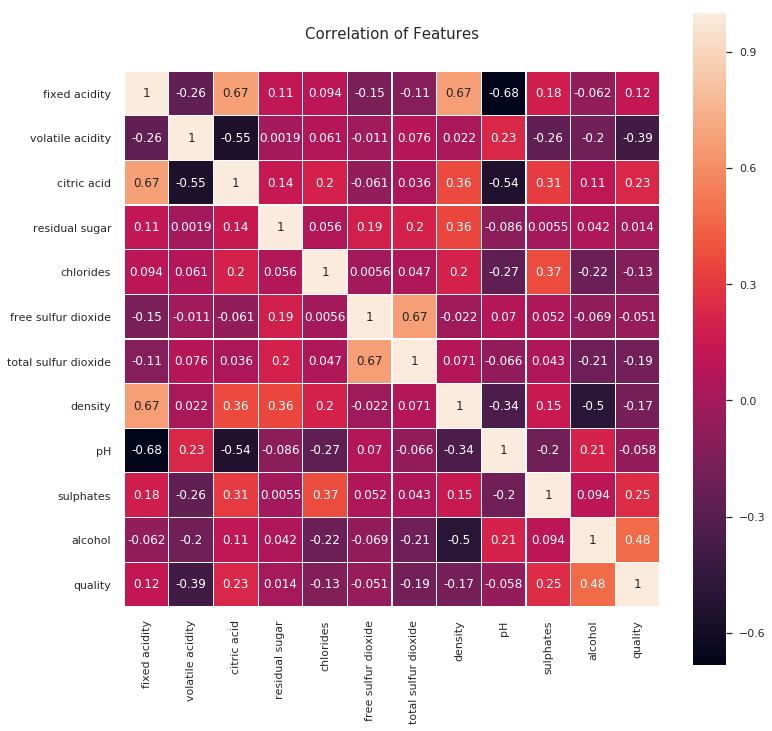

In [12]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(origin_data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True)

- fixed acidity vs citric acid
- fixed acidity vs density
- fixed acidity vs ph(-)

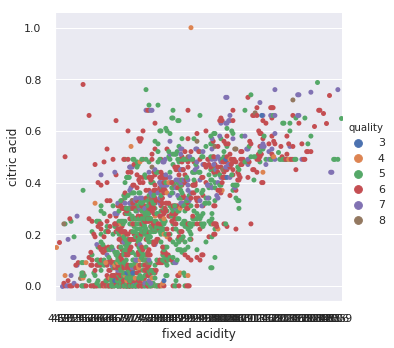

In [13]:
sns.catplot(x="fixed acidity", y="citric acid", hue="quality",kind='swarm', data=origin_data);

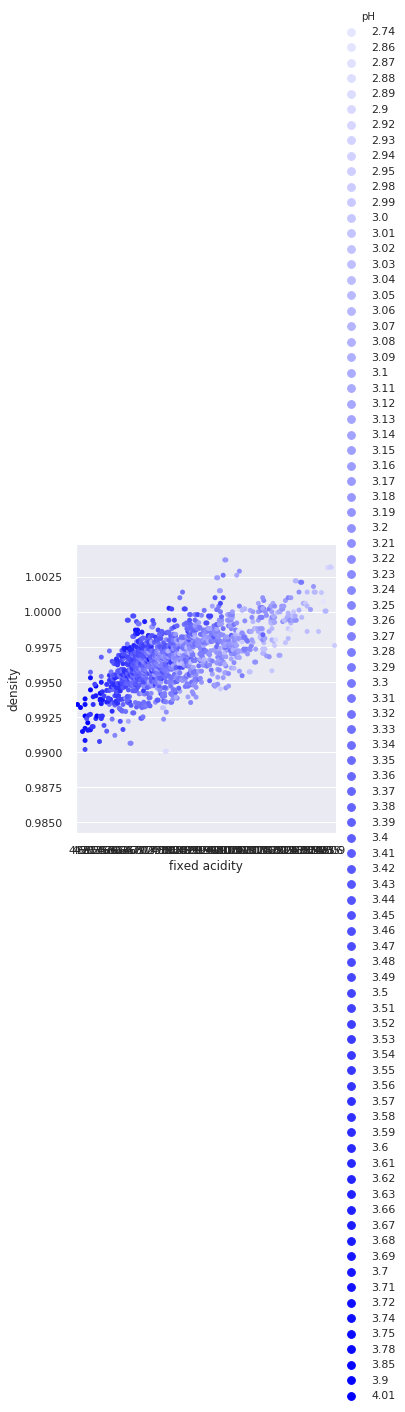

In [14]:
sns.catplot(x="fixed acidity", y="density", hue="pH",kind='swarm', data=origin_data, color='blue');

- fixed acidity vs citric acid
- fixed acidity vs density
- fixed acidity vs ph(-)

In [15]:
origin_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

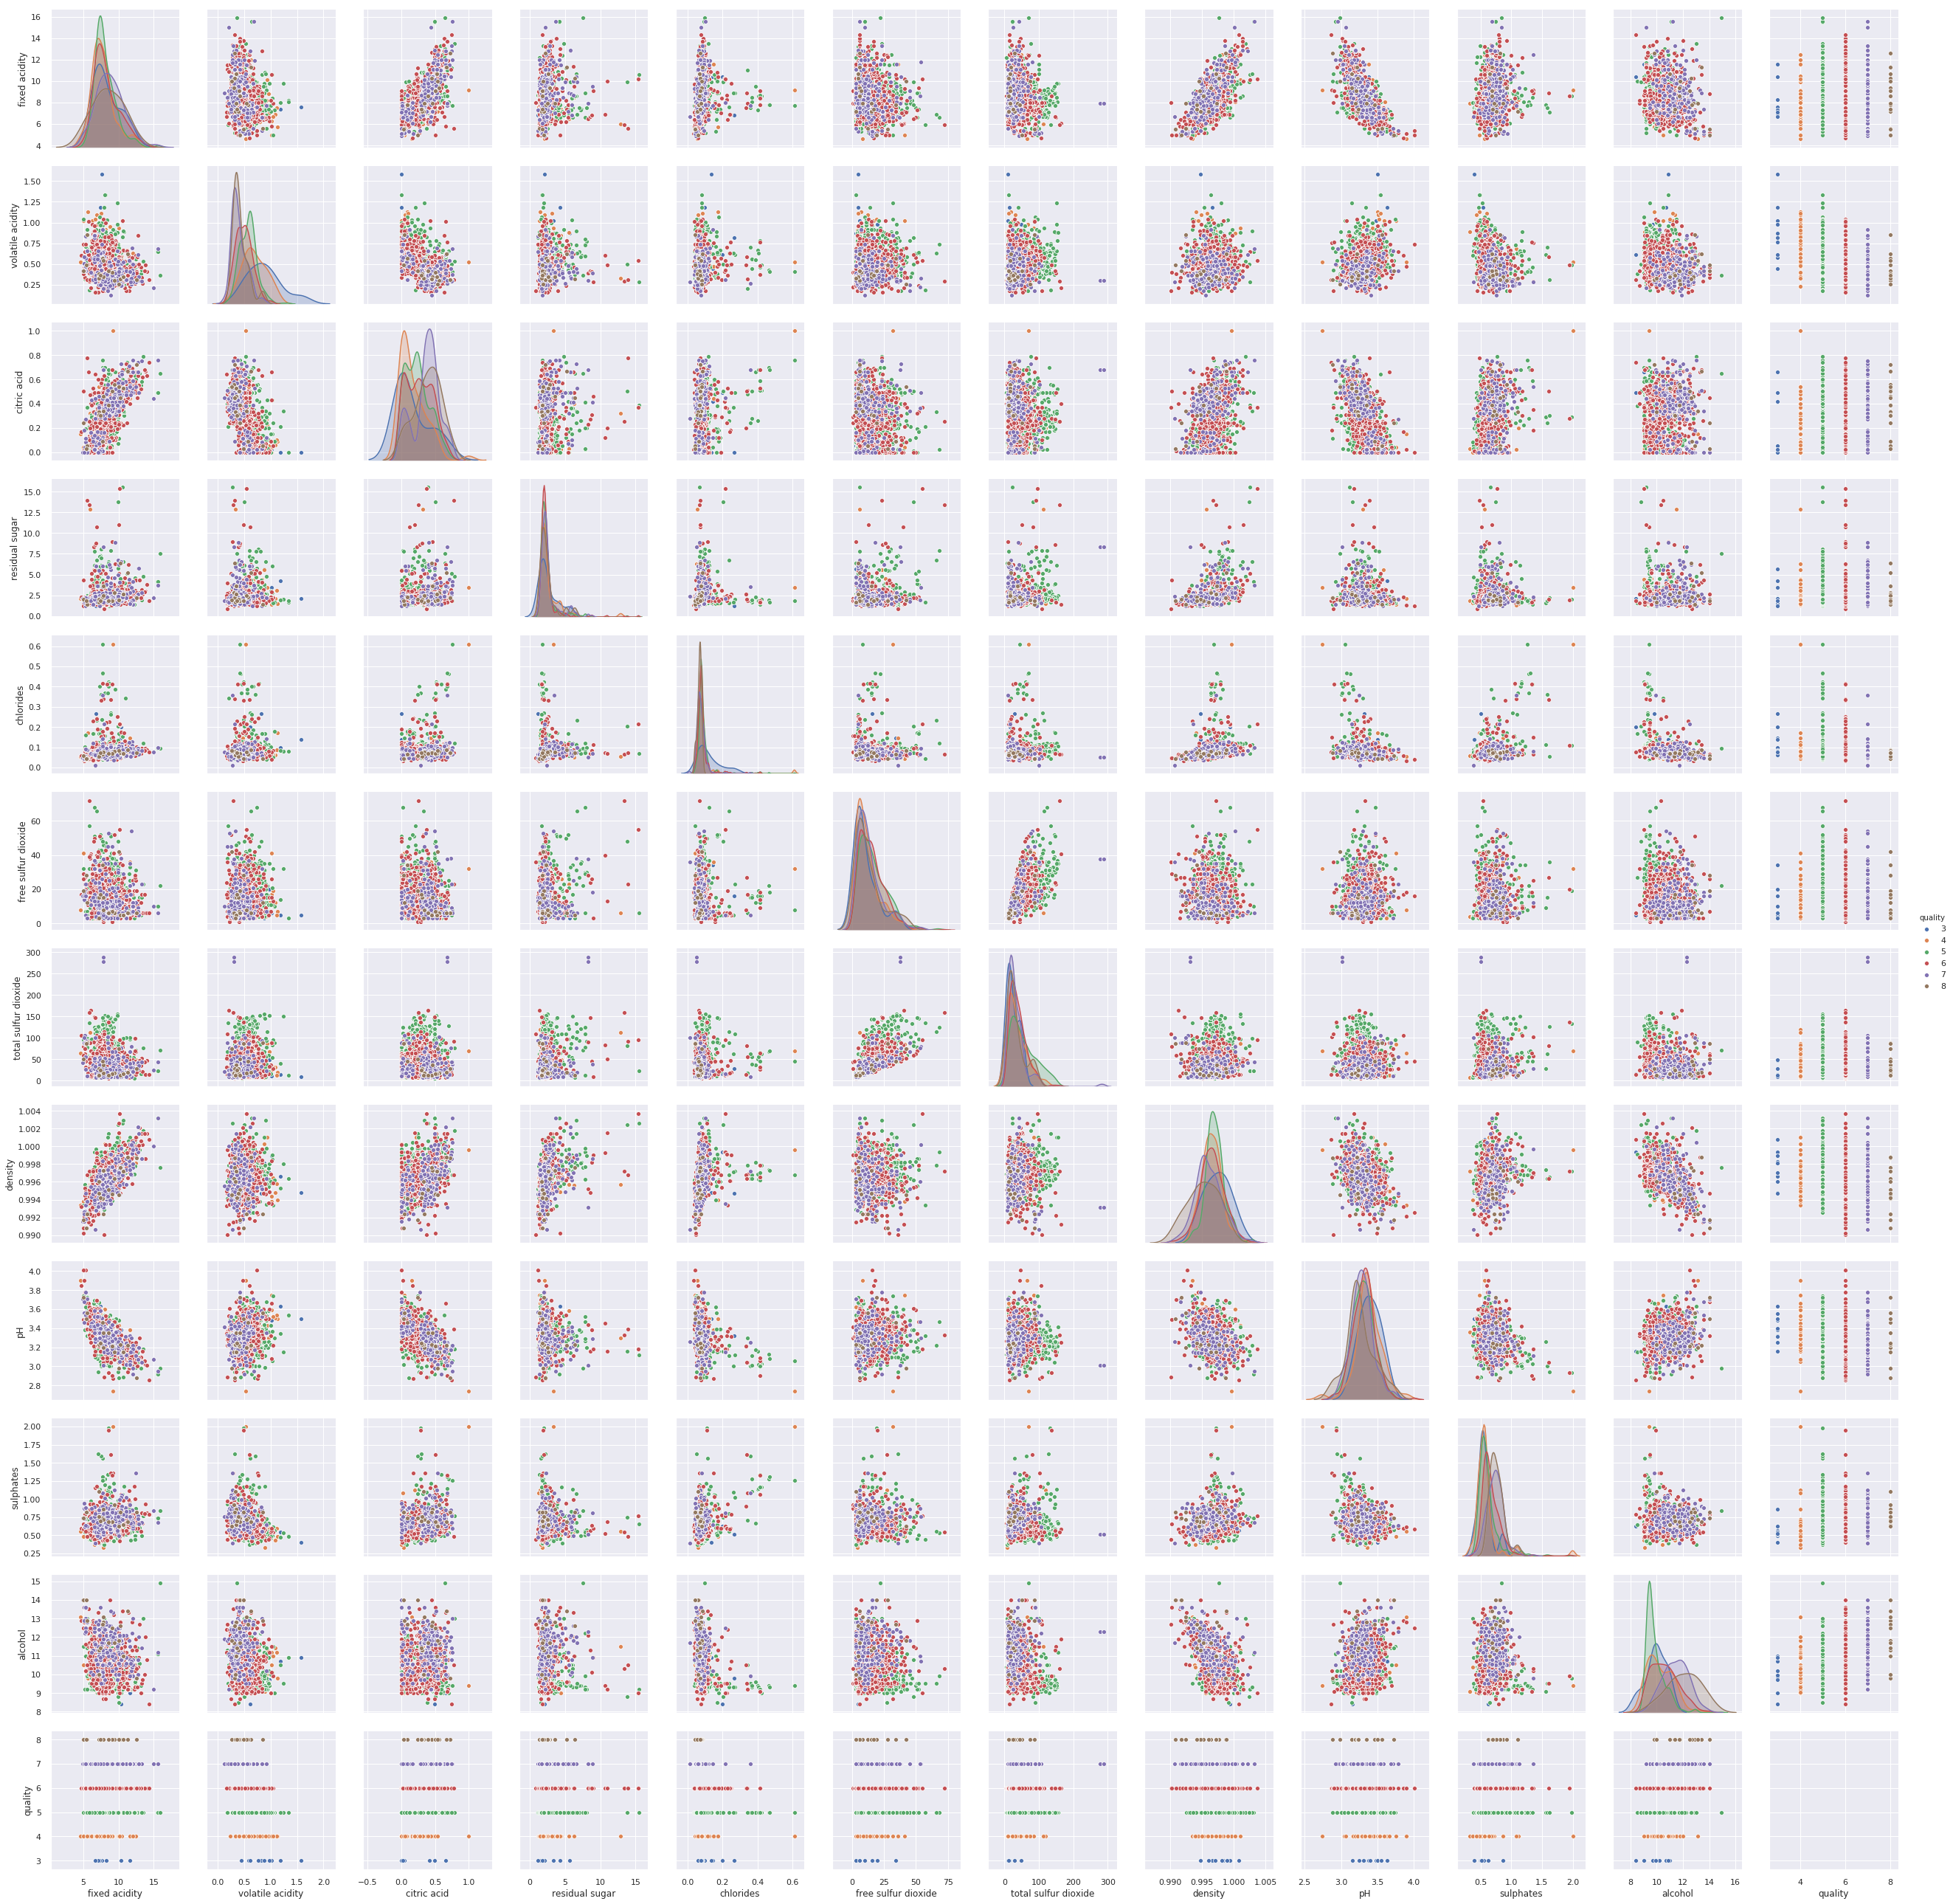

In [18]:
sns.pairplot(origin_data, hue='quality', size=3)

## Quality 기준 corr

['quality' 'alcohol' 'volatile acidity' 'sulphates' 'citric acid'
 'total sulfur dioxide' 'chlorides' 'density' 'fixed acidity'
 'free sulfur dioxide' 'pH' 'residual sugar']


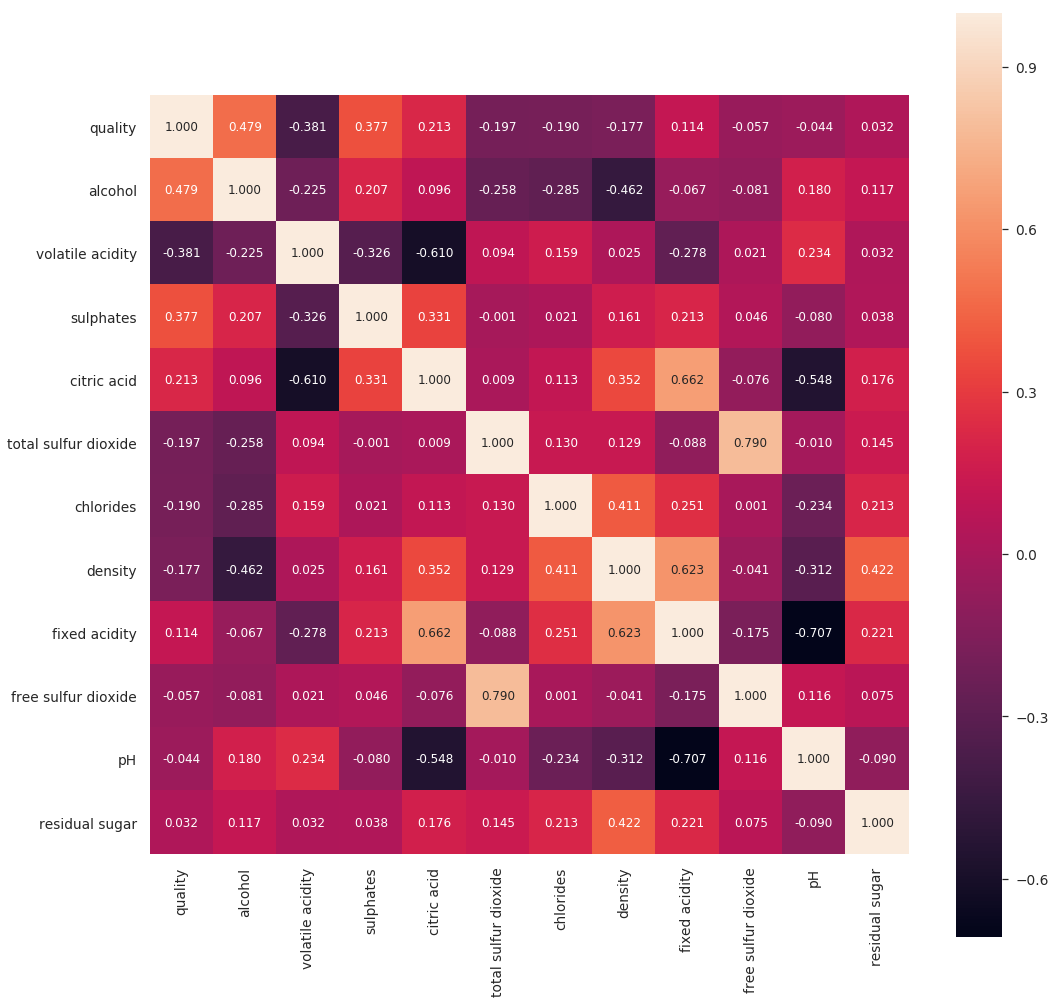

In [20]:
import scipy as sp

cor_abs = abs(origin_data.corr(method='spearman')) 
cor_cols = cor_abs.nlargest(n=15, columns='quality').index # price과 correlation이 높은 column 10개 뽑기(내림차순)

cor = np.array(sp.stats.spearmanr(origin_data[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(17,17))
sns.set(font_scale=1.25)

sns.heatmap(cor.astype(float), fmt='.3f', annot=True, square=True , annot_kws={'size' : 12} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)

- quality vs alcohol
- quality vs volatile acidity(-)
- quality vs sulphates

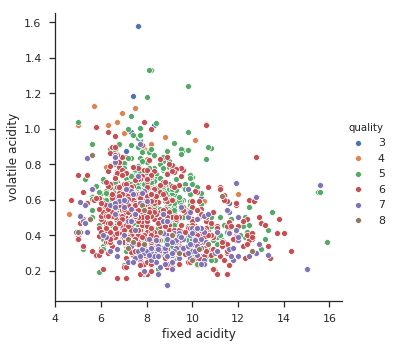

In [22]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(origin_data, x_vars = ['fixed acidity'], y_vars=['volatile acidity'], hue="quality", size=5)

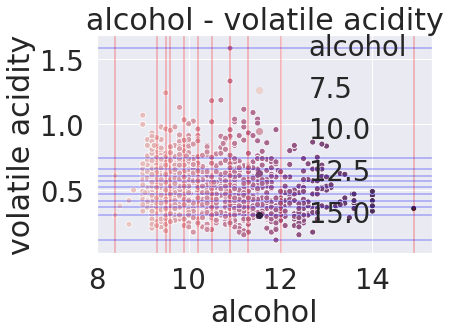

In [243]:
scatter_quantile_graph(origin_data, 'alcohol', 'volatile acidity')

## Quality vs Volatile acidity(-)

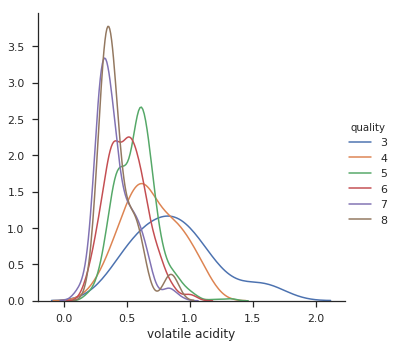

In [33]:
sns.FacetGrid(origin_data, hue='quality', size=5).map(sns.kdeplot, 'volatile acidity').add_legend()

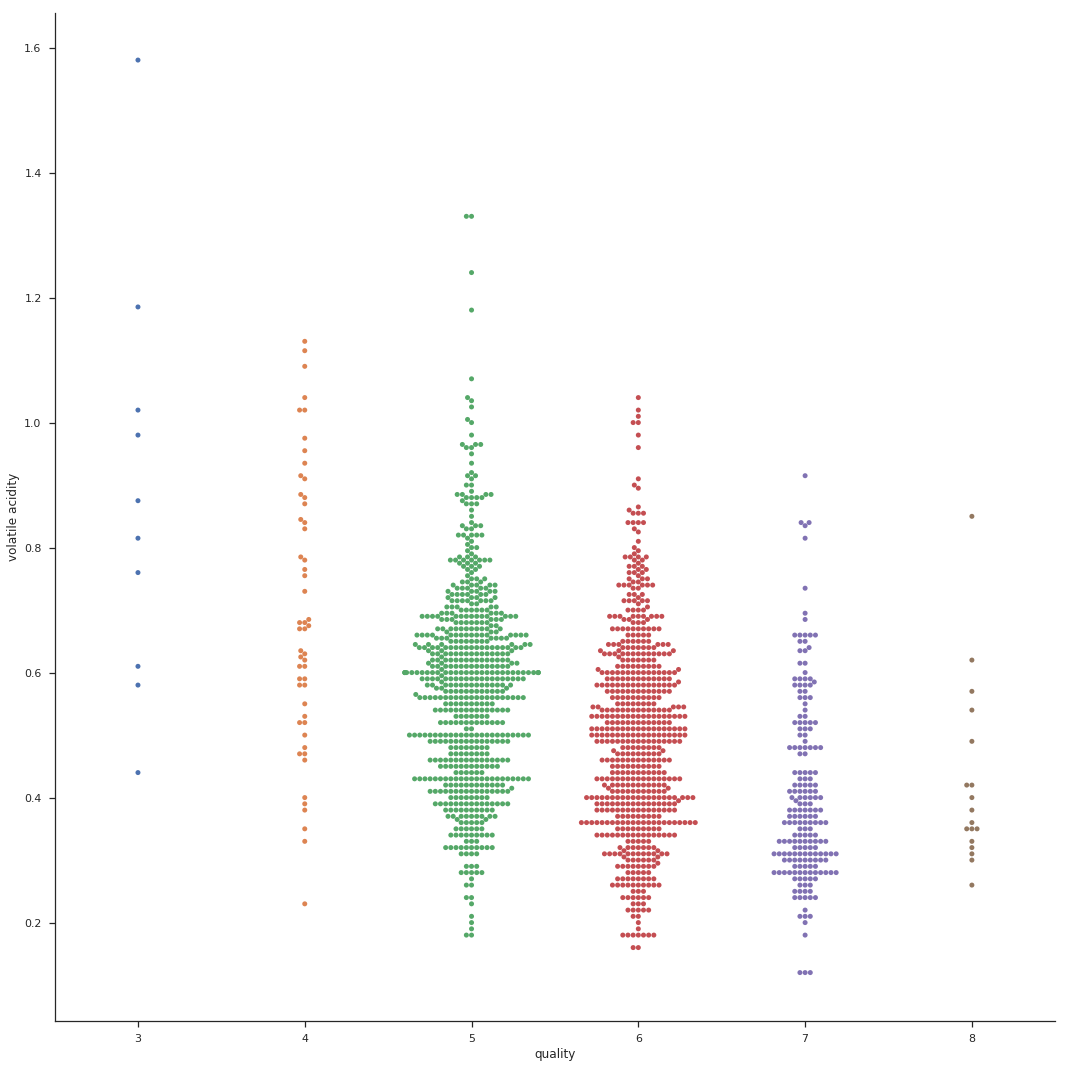

In [34]:
sns.catplot(x="quality", y="volatile acidity", hue="quality",kind='swarm', size=15, data=origin_data);

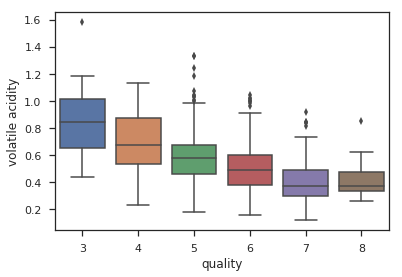

In [31]:
sns.boxplot(x='quality', y = 'volatile acidity', data=origin_data)

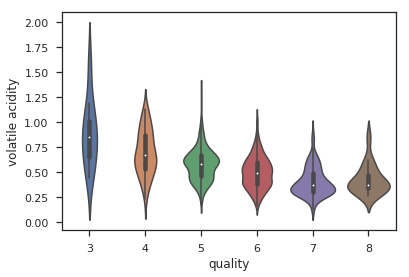

In [32]:
sns.violinplot(x='quality', y='volatile acidity', hue = '', data=origin_data)

## Quality vs Alcohol

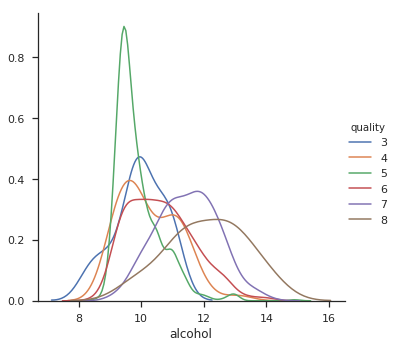

In [35]:
sns.FacetGrid(origin_data, hue='quality', size=5).map(sns.kdeplot, 'alcohol').add_legend()

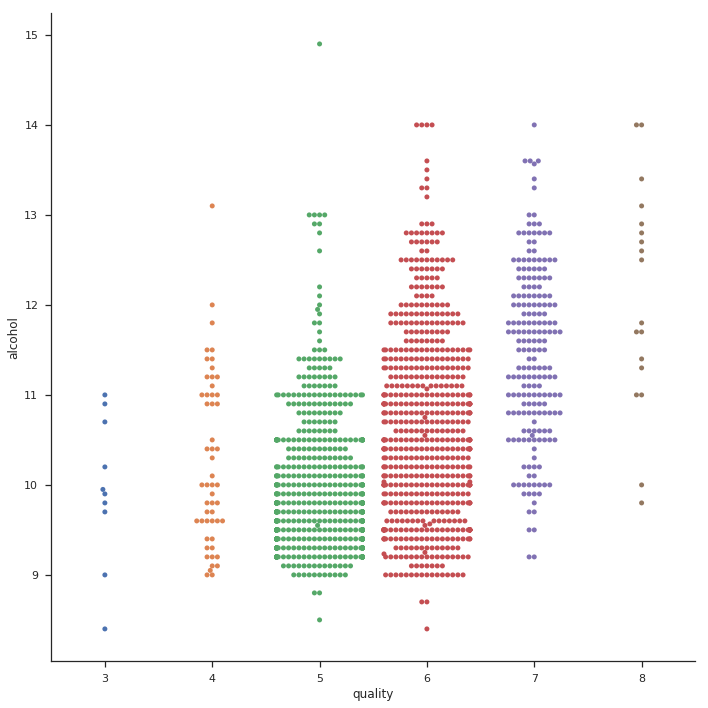

In [27]:
sns.catplot(x="quality", y="alcohol", hue="quality",kind='swarm', size=10,data=origin_data);

## Quality vs Sulphates

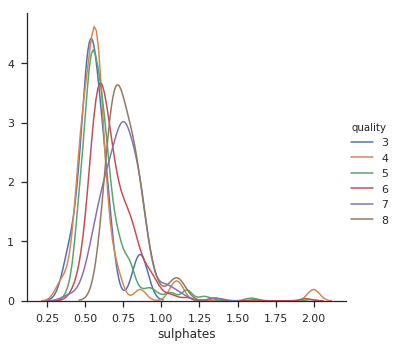

In [37]:
sns.FacetGrid(origin_data, hue='quality', size=5).map(sns.kdeplot, 'sulphates').add_legend()

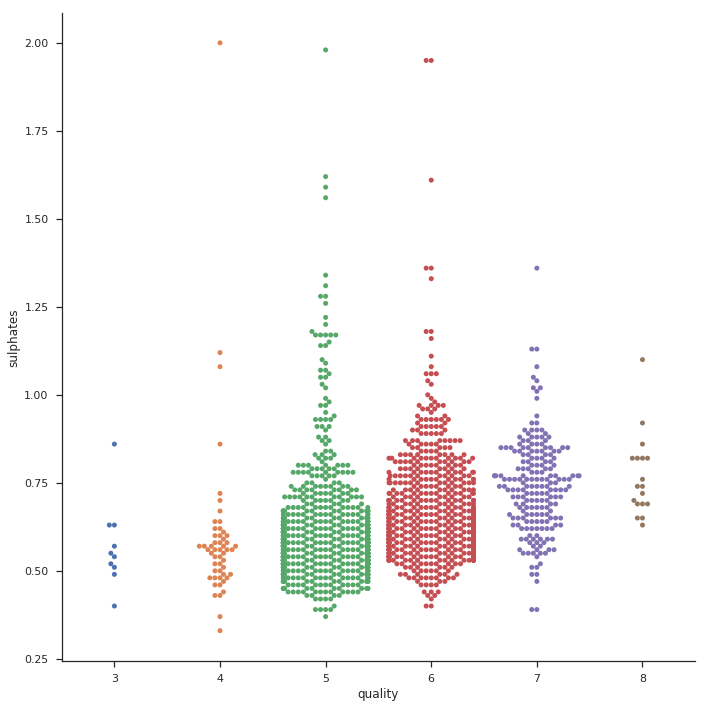

In [29]:
sns.catplot(x="quality", y="sulphates", hue="quality",kind='swarm', size=10, data=origin_data);

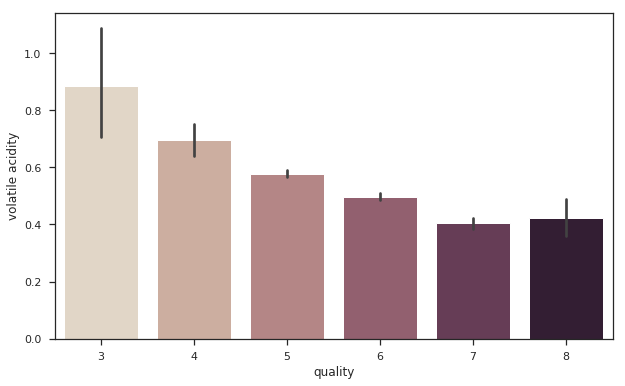

In [38]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity',palette="ch:.25", data = origin_data)

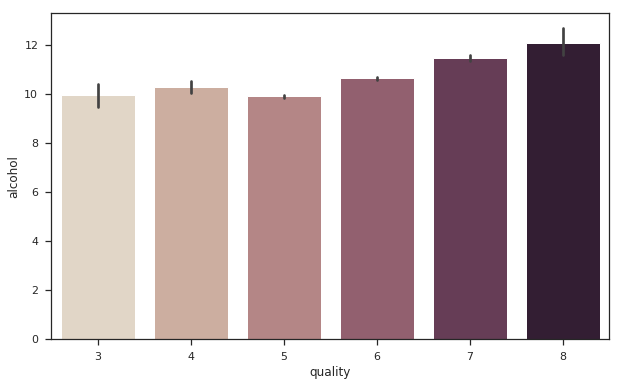

In [39]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol',palette="ch:.25", data = origin_data)

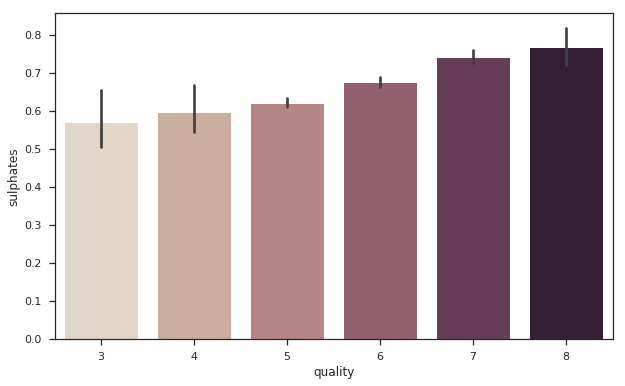

In [40]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates',palette="ch:.25", data = origin_data)

In [41]:
origin_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Multivariate Analysis

### Alcohol vs Volatile Acidity with Quality as Color

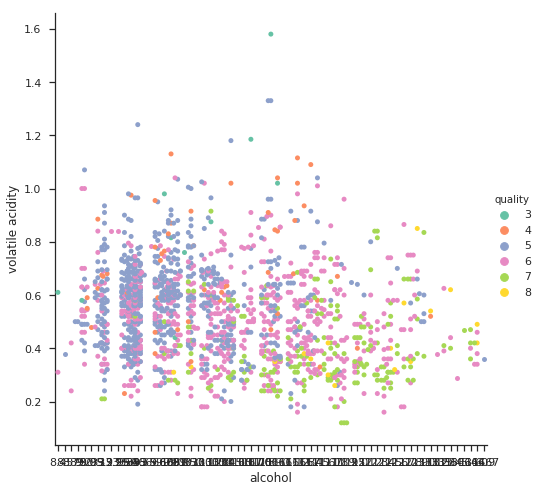

In [46]:
# plt.figure(figsize=(30,30))
sns.catplot(x="alcohol", y="volatile acidity",hue = 'quality', height=5, kind='swarm',  palette ='Set2', size=7, data=origin_data)

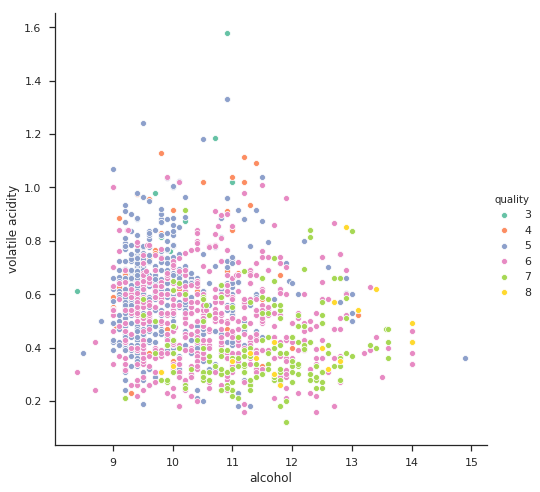

In [51]:
sns.pairplot(origin_data, x_vars = ['alcohol'], y_vars=['volatile acidity'], hue="quality", palette ='Set2',size=7)

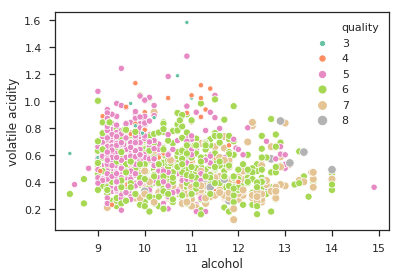

In [52]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="alcohol", y="volatile acidity",
                      hue="quality", size="quality",
                      palette="Set2", legend='full', data=origin_data)

## quality 분포

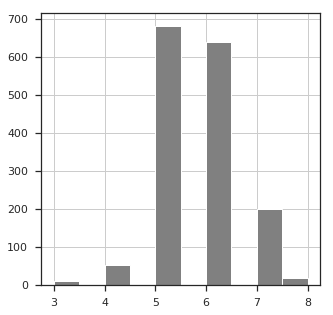

In [54]:
wine_quality.hist(figsize=(5,5), color='gray')
plt.show()

> quality     와인 품질(나쁨 : 0 ~ 좋음 : 10)
> 5 이상을 좋은거라고 봄

In [ ]:
# Acid: fixed acidity, volatile acidity, citric acid
# Sugar: residual suga
# Salt: chlorides
# Alcohol: alcohol
# Chemicals: sulfur dioxide(free and total), sulphates, pH
# Physical: density

In [55]:
# y1 = (yy > 5).astype(int)
# y1.head(10)

wine_quality.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [56]:
type(wine_quality)

pandas.core.series.Series

In [57]:
wine_quality.index

RangeIndex(start=0, stop=1599, step=1)

In [58]:
wine_quality.values


array([5, 5, 5, ..., 6, 5, 6])

In [59]:
y_bad = list()
y_average = list()
y_good = list() 

for grade in wine_quality:
    if grade < 5:
        y_bad.append(grade)

    elif (grade >=5 and grade <= 6):
        y_average.append(grade)

    else:
        y_good.append(grade)


# tmp = [y_bad, y_good, y_superior]
# res = pd.Series(tmp)
# print(res)
# print(type(res))


res = pd.Series(y_bad)
res2 = pd.Series(y_average)
res3 = pd.Series(y_good)


In [60]:
print(len(res))
print(len(res2))
print(len(res3))

63
1319
217


In [61]:
count_res = pd.Series([len(res), len(res2), len(res3)], index = ['0','1','2'])
count_res

0      63
1    1319
2     217
dtype: int64

In [62]:
idx = count_res.index
idx

Index(['0', '1', '2'], dtype='object')

In [63]:
val = count_res.values
val = list(val)
print(val)
print(type(val))


[63, 1319, 217]
<class 'list'>


In [64]:
count_res_df = pd.DataFrame(data=val, index=idx)
print(type(count_res_df))

print(count_res_df)
print(type(count_res_df))

<class 'pandas.core.frame.DataFrame'>
      0
0    63
1  1319
2   217
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# ax = count_res_df.hist(color='gray')


In [65]:
d = {'level': [0,1,2], 'count': [63,1319,217]}
count_res_df = pd.DataFrame(data=d)
count_res_df



level  count
0      0     63
1      1   1319
2      2    217

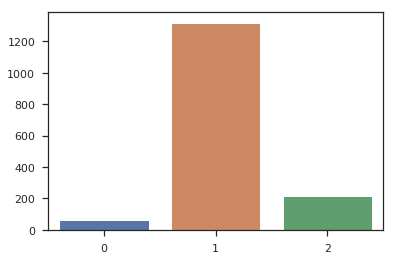

In [86]:
# plt.bar(idx,val,align='center') # A bar chart
# plt.xlabel('level(bad-good-great)')
# plt.ylabel('wine count')
# plt.show()

sns.barplot(x=idx, y = val, data=origin_data)

In [72]:
origin_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [73]:
# bins = (2,5,6,8)
group_names = ['bad','average','good']
categories = pd.cut(origin_data['quality'], 3, labels = group_names)
origin_data['grade'] = categories

In [75]:
origin_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [76]:
origin_data['quality'].head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [77]:
origin_data['grade'].head()

0    average
1    average
2    average
3    average
4    average
Name: grade, dtype: category
Categories (3, object): [bad < average < good]

In [79]:
print(type(origin_data['quality']))

<class 'pandas.core.series.Series'>


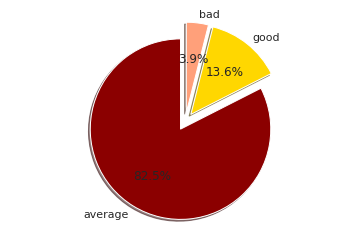

In [80]:
sizes = origin_data['grade'].value_counts()
topic = ['average','good','bad']
labels = list(topic)
colors = ['darkred','gold','lightsalmon']


plt.pie(sizes, explode=[0.1,0.1, 0.1], labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)   #line 240

#plt.pie(sizes, labels, colors)
plt.axis('equal')
# plt.legend()
plt.show()

In [97]:
# import pyecharts
# # print('version: ', pyecharts.__version__)

# from pyecharts import Pie

# attr = ['A','B','C','D','E','F']
# v1 = [10, 20, 30, 40, 50, 60]
# v2 = [38, 28, 58, 48, 78, 68]
# pie = Pie("pie chart", title_pos="center", width=600)
# pie.add("A", attr, v1, center=[25, 50], is_random=True, radius=[30, 75], rosetype='radius')
# pie.add("B", attr, v2, center=[75, 50], is_randome=True, radius=[30, 75], rosetype='area', is_legend_show=False,
#        is_label_show=True)
# pie

ImportError: cannot import name 'Pie' from 'pyecharts' (/home/pirl/anaconda3/lib/python3.7/site-packages/pyecharts/__init__.py)

In [82]:
origin_data['grade'].value_counts()

average    1319
good        217
bad          63
Name: grade, dtype: int64

In [83]:
origin_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [87]:
origin_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality    grade  
0      9.4        5  average  
1      9.8        5  average  
2      9.8        5  average  
3      9.8        6  average  
4      9.4        5  average

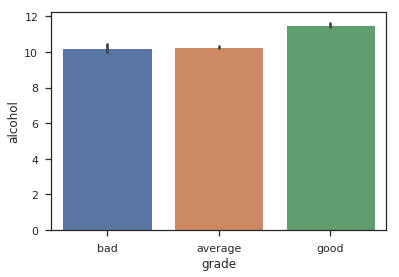

In [85]:
sns.barplot(x='grade', y = 'alcohol', data=origin_data)

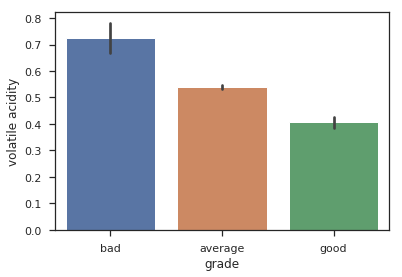

In [91]:
sns.barplot(x='grade', y = 'volatile acidity', data=origin_data)

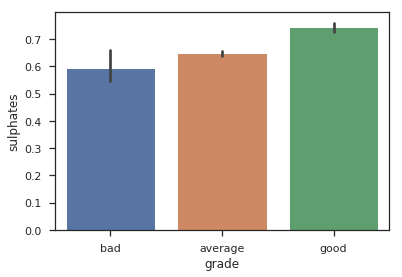

In [90]:
sns.barplot(x='grade', y = 'sulphates', data=origin_data)

#### great Wine  
   >        - `sulphates` (황산염,아황산염,  )가 많고
            - `alcohol` 가 많고
            - volatile acidity(산도, 신 냄새)가 적다
            
            
            - 단 와인은 2차 발효 과정을 멈추기 위해 더 많은 sulphates를 필요로 함
            - 아황산염을 피하는 방법은 DRY한 와인을 선택하는 것(단 와인은 아황산염이 많나??)
            - 산도(acidity)가 높은 와인은 아황산염이 낮음

In [106]:
wine_grade = origin_data.grade
wine_grade.values

[average, average, average, average, average, ..., average, average, average, average, average]
Length: 1599
Categories (3, object): [bad < average < good]

In [107]:
print(type(origin_data['grade']))

<class 'pandas.core.series.Series'>


In [99]:
wine_grade.index

RangeIndex(start=0, stop=1599, step=1)

In [100]:
wine_grade.values

array([5, 5, 5, ..., 6, 5, 6])

In [110]:
wine_grade.value_counts()

average    1319
good        217
bad          63
Name: grade, dtype: int64

In [ ]:
sizes = origin_data['grade'].value_counts()
topic = ['average','good','bad']
labels = list(topic)
colors = ['darkred','gold','lightsalmon']


plt.pie(sizes, explode=[0.1,0.1, 0.1], labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)   #line 240

#plt.pie(sizes, labels, colors)
plt.axis('equal')
# plt.legend()
plt.show()

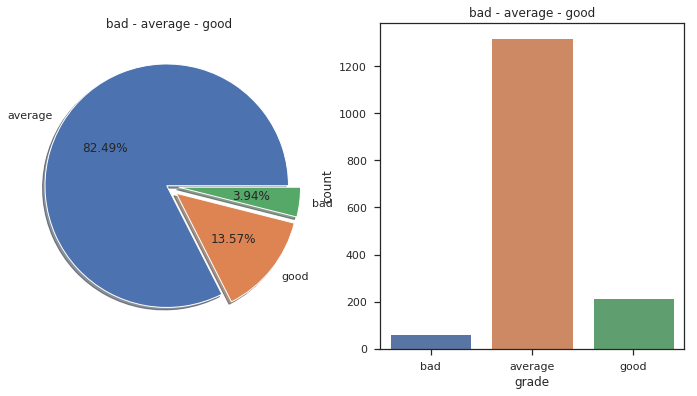

In [116]:
f, ax = plt.subplots(1,2,figsize=(12,6))#도화지

wine_grade.value_counts().plot.pie(explode=[0, 0.1, 0.1], autopct = '%1.2f%%', ax=ax[0], shadow=True)
ax[0].set_title(' bad - average - good')
ax[0].set_ylabel('')

sns.countplot(wine_grade, data = origin_data,  ax=ax[1])
ax[1].set_title('bad - average - good')
plt.show()


In [144]:
X = origin_data.drop('quality', axis=1)
X = X.drop('grade', axis=1)
Y = origin_data['quality']
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [156]:
X_grade = origin_data.drop('grade', axis=1)
X_grade = X_grade.drop('quality', axis=1)
Y_grade = origin_data['grade']

In [145]:
Y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

## Data Devide

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1279, 11) (320, 11) (1279,) (320,)


In [164]:
g_X_train, g_X_test, g_y_train, g_y_test = train_test_split(X_grade, Y_grade, test_size=0.2, random_state = 42)
print(g_X_train.shape, g_X_test.shape, g_y_train.shape, g_y_test.shape)


(1279, 11) (320, 11) (1279,) (320,)


In [147]:
RF_clf = RandomForestClassifier(random_state = 42)
RF_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [148]:
sc = StandardScaler()

In [149]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [165]:
g_X_train = sc.fit_transform(g_X_train)
g_X_test = sc.fit_transform(g_X_test)

## RandomForestClassifier

In [150]:
X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [152]:
RF_clf = RandomForestClassifier(n_estimators=200)
RF_clf.fit(X_train, y_train)
pred_rfc = RF_clf.predict(X_test)

In [155]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.68      0.77      0.72       130
           6       0.60      0.66      0.63       132
           7       0.59      0.40      0.48        42
           8       0.00      0.00      0.00         5

   micro avg       0.64      0.64      0.64       320
   macro avg       0.31      0.31      0.31       320
weighted avg       0.60      0.64      0.62       320



In [157]:
print(confusion_matrix(y_test, pred_rfc))

[[  0   0   1   0   0   0]
 [  0   0   7   3   0   0]
 [  0   0 100  29   1   0]
 [  0   0  38  87   7   0]
 [  0   0   0  24  17   1]
 [  0   0   0   1   4   0]]


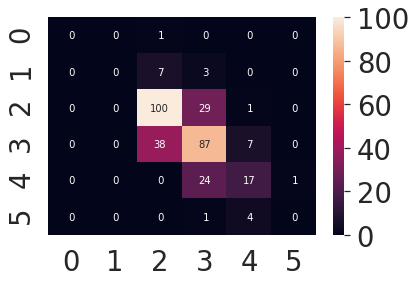

In [175]:
cm = confusion_matrix(y_test, pred_rfc)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [176]:
from sklearn.metrics import f1_score

print(f1_score(g_y_test, pred_rfc2, average = 'macro'))
print(f1_score(g_y_test, pred_rfc2, average = 'micro'))
print(f1_score(g_y_test, pred_rfc2, average = 'weighted'))

0.470464135021097
0.846875
0.8196400316455696


# grade 등급별

In [169]:
RF_clf2 = RandomForestClassifier(n_estimators=200)
RF_clf2.fit(g_X_train, g_y_train)
pred_rfc2 = RF_clf2.predict(g_X_test)

In [170]:
print(classification_report(g_y_test, pred_rfc2))

              precision    recall  f1-score   support

     average       0.87      0.96      0.91       262
         bad       0.00      0.00      0.00        11
        good       0.66      0.40      0.50        47

   micro avg       0.85      0.85      0.85       320
   macro avg       0.51      0.46      0.47       320
weighted avg       0.81      0.85      0.82       320



In [172]:
print(confusion_matrix(g_y_test, pred_rfc2))

[[252   0  10]
 [ 11   0   0]
 [ 28   0  19]]


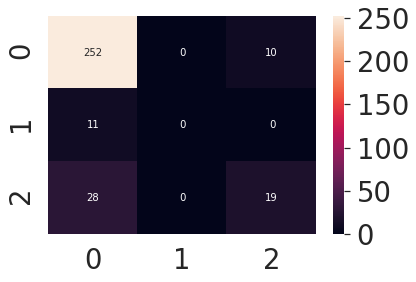

In [173]:
cm = confusion_matrix(g_y_test, pred_rfc2)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [174]:

print(f1_score(g_y_test, pred_rfc2, average = 'macro'))
print(f1_score(g_y_test, pred_rfc2, average = 'micro'))
print(f1_score(g_y_test, pred_rfc2, average = 'weighted'))

0.470464135021097
0.846875
0.8196400316455696


## train and evaluate

In [124]:
# cv_scores = cross_val_score(RF_clf, X_train, y_train,  scoring='accuracy')

# print('The accuracy scores for the iterations are {}'.format(cv_scores))
# print('\nThe mean accuracy score is {}'.format(cv_scores.mean().round(6)))
# print('\nThe std accuracy score is {}'.format(cv_scores.std().round(6)))


TypeError: '<' not supported between instances of 'str' and 'float'

## Perform predictions

In [ ]:
# RF_clf.fit(X_train, y_train)
# pred_RF = RF_clf.predict(X_test)



In [177]:
rate = 0
for i in range(0,20):
    if y_test.iloc[i] == pred_rfc[i]:
        res = 1
    else:
        res = 0
    print('Actual quality : ', y_test.iloc[i], '\t predicted : ', pred_rfc[i], '\t result : ',  res)
    rate = rate + res

    
print('\n{:.3%}'.format(rate/i))



Actual quality :  6 	 predicted :  5 	 result :  0
Actual quality :  5 	 predicted :  5 	 result :  1
Actual quality :  6 	 predicted :  5 	 result :  0
Actual quality :  5 	 predicted :  5 	 result :  1
Actual quality :  6 	 predicted :  6 	 result :  1
Actual quality :  5 	 predicted :  5 	 result :  1
Actual quality :  5 	 predicted :  5 	 result :  1
Actual quality :  5 	 predicted :  5 	 result :  1
Actual quality :  5 	 predicted :  6 	 result :  0
Actual quality :  6 	 predicted :  6 	 result :  1
Actual quality :  7 	 predicted :  7 	 result :  1
Actual quality :  3 	 predicted :  5 	 result :  0
Actual quality :  5 	 predicted :  6 	 result :  0
Actual quality :  5 	 predicted :  5 	 result :  1
Actual quality :  6 	 predicted :  6 	 result :  1
Actual quality :  7 	 predicted :  6 	 result :  0
Actual quality :  5 	 predicted :  5 	 result :  1
Actual quality :  7 	 predicted :  6 	 result :  0
Actual quality :  8 	 predicted :  7 	 result :  0
Actual quality :  5 	 predicted

In [178]:
rate2 = 0
for i in range(0,20):
    if g_y_test.iloc[i] == pred_rfc2[i]:
        res2 = 1
    else:
        res2 = 0
    print('Actual quality : ', g_y_test.iloc[i], '\t predicted : ', pred_rfc2[i], '\t result : ',  res2)
    rate2 = rate2 + res2
print('\n{:.3%}'.format(rate2/i))




Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  good 	 predicted :  good 	 result :  1
Actual quality :  bad 	 predicted :  average 	 result :  0
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  good 	 predicted :  average 	 result :  0
Actua

## Accuracy, log loss and confusion matrix

In [184]:
print(accuracy_score(y_test, pred_rfc)*100)
# print(log_loss(y_test, pred_rfc))

print('\n')

print(accuracy_score(g_y_test, pred_rfc2)*100)
# print(log_loss(g_y_test, pred_rfc2))

63.74999999999999


84.6875


---

# Support Vector Classifier

In [190]:
svc = SVC()
svc.fit(g_X_train, g_y_train)
pred_svc = svc.predict(g_X_test)

In [194]:
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [245]:
print(type(pred_svc))

<class 'numpy.ndarray'>


In [191]:
print(classification_report(g_y_test, pred_svc))

              precision    recall  f1-score   support

     average       0.85      0.98      0.91       262
         bad       0.00      0.00      0.00        11
        good       0.71      0.26      0.37        47

   micro avg       0.84      0.84      0.84       320
   macro avg       0.52      0.41      0.43       320
weighted avg       0.80      0.84      0.80       320



[[257   0   5]
 [ 11   0   0]
 [ 35   0  12]]


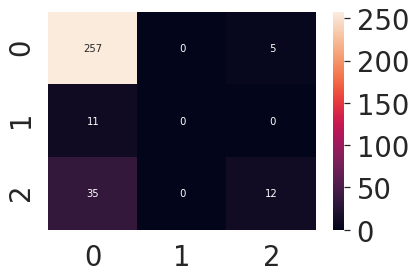

In [192]:
print(confusion_matrix(g_y_test, pred_svc))
cm = confusion_matrix(g_y_test, pred_svc)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [193]:
print(accuracy_score(g_y_test, pred_svc)*100)

84.0625


# Grid Search SCV

In [197]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [198]:
grid_svc.fit(g_X_train, g_y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [199]:
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [200]:
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(g_X_train, g_y_train)
pred_svc2 = svc2.predict(g_X_test)
print(classification_report(g_y_test, pred_svc2))

              precision    recall  f1-score   support

     average       0.86      0.99      0.92       262
         bad       0.00      0.00      0.00        11
        good       0.89      0.34      0.49        47

   micro avg       0.86      0.86      0.86       320
   macro avg       0.58      0.44      0.47       320
weighted avg       0.84      0.86      0.83       320



> GridSearch improves from `84% to 86%` using Grid Search CV

# Cross Validation Score for RF

In [205]:
rfc_eval = cross_val_score(RF_clf2, g_X_train, g_y_train, cv=10, scoring='accuracy')

print('\nThe accuracy scores for the iterations are \n{}'.format(rfc_eval))
print('\nThe mean accuracy score is {}'.format(rfc_eval.mean().round(6)))
print('\nThe std accuracy score is {}'.format(rfc_eval.std().round(6)))



The accuracy scores for the iterations are 
[0.82945736 0.84496124 0.875      0.90625    0.8828125  0.8359375
 0.8828125  0.88188976 0.85826772 0.8976378 ]

The mean accuracy score is 0.869503

The std accuracy score is 0.024776


In [206]:
rfc_eval = cross_val_score(RF_clf2, g_X_train, g_y_train, cv=10)

print('\nThe accuracy scores for the iterations are \n{}'.format(rfc_eval))
print('\nThe mean accuracy score is {}'.format(rfc_eval.mean().round(6)))
print('\nThe std accuracy score is {}'.format(rfc_eval.std().round(6)))



The accuracy scores for the iterations are 
[0.8372093  0.84496124 0.875      0.90625    0.890625   0.8359375
 0.8828125  0.88976378 0.8503937  0.90551181]

The mean accuracy score is 0.871846

The std accuracy score is 0.026063


> Cross Val Score -> `87.1846`

## LogisticRegression

In [207]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(random_state=42)
LR_clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## train and evaluate using cross validation

In [208]:
cv_scores = cross_val_score(LR_clf, g_X_train, g_y_train, cv=10, scoring='accuracy')

print('The accuracy scores for the iterations are {}'.format(cv_scores))
print('\nThe mean accuracy score is {}'.format(cv_scores.mean().round(6)))
print('\nThe std accuracy score is {}'.format(cv_scores.std().round(6)))

The accuracy scores for the iterations are [0.84496124 0.84496124 0.8515625  0.8671875  0.8515625  0.8125
 0.8515625  0.88188976 0.84251969 0.8503937 ]

The mean accuracy score is 0.84991

The std accuracy score is 0.016831


## Perform predictions

In [210]:
LR_clf.fit(g_X_train, g_y_train)
pred_LR = LR_clf.predict(g_X_test)

In [212]:
rate = 0
for i in range(0,20):
    if g_y_test.iloc[i] == pred_LR[i]:
        res = 1
    else:
        res = 0
    print('Actual quality : ', g_y_test.iloc[i], '\t predicted : ', pred_LR[i], '\t result : ',  res)
    rate = rate + res
print('{:.3%}'.format((rate/i)))

Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  good 	 predicted :  average 	 result :  0
Actual quality :  bad 	 predicted :  average 	 result :  0
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  average 	 predicted :  average 	 result :  1
Actual quality :  good 	 predicted :  good 	 result :  1
Actua

In [214]:
print(accuracy_score(g_y_test, pred_LR))
# print(log_loss(g_y_test, pred_LR))

0.834375


In [215]:
print(confusion_matrix(g_y_test, pred_LR))

[[256   0   6]
 [ 11   0   0]
 [ 36   0  11]]


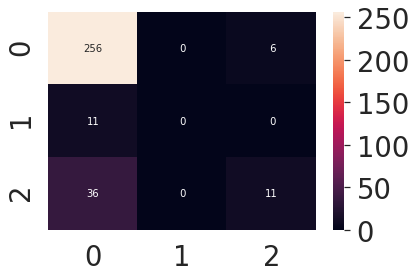

In [217]:
cm = confusion_matrix(g_y_test, pred_LR)
sns.heatmap(cm, annot=True, fmt='2.0f' )

In [219]:
print(classification_report(g_y_test, pred_LR))

              precision    recall  f1-score   support

     average       0.84      0.98      0.91       262
         bad       0.00      0.00      0.00        11
        good       0.65      0.23      0.34        47

   micro avg       0.83      0.83      0.83       320
   macro avg       0.50      0.40      0.42       320
weighted avg       0.79      0.83      0.79       320



In [222]:
from sklearn.model_selection import GridSearchCV
grid_values = {'n_estimators':[50,100,150,180,200,220],'max_depth':[None,30,20,15,10,5],
               'max_features':['auto','sqrt','log2'],'min_samples_leaf':[1,3,5,7,20,50,100]}
grid_RF = GridSearchCV(RF_clf,param_grid=grid_values,scoring='accuracy')
grid_RF.fit(g_X_train, g_y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 180, 200, 220], 'max_depth': [None, 30, 20, 15, 10, 5], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 3, 5, 7, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [223]:
grid_RF.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [231]:
RF_clf = RandomForestClassifier(n_estimators=100)
RF_clf.fit(g_X_train,g_y_train)
pred_RF = RF_clf.predict(g_X_test)

In [232]:
print(accuracy_score(g_y_test,pred_RF))


0.85625


In [233]:
print(confusion_matrix(g_y_test,pred_RF))

[[253   0   9]
 [ 10   1   0]
 [ 27   0  20]]


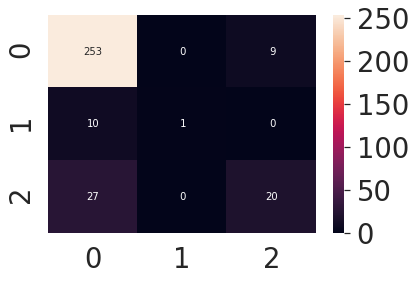

In [234]:
cm = confusion_matrix(g_y_test,pred_RF)
sns.heatmap(cm, annot = True, fmt='2.0f')

> `107` error, 
> hyperparameter tuning 후에 accuracy가 `74.00%`에서  `77.00%` 증가하는 것을 확인,